**Sate Antaranyan**

In [78]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter,\
                      WeibullAFTFitter,\
                      LogNormalAFTFitter,\
                      LogLogisticAFTFitter,\
                      KaplanMeierFitter
from lifelines.datasets import load_waltons

In [79]:
data = pd.read_csv('telco.csv')
data

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No


In [80]:
data.set_index('ID', inplace = True)
#yes - 1, no - 0 for churn
data['churn'] = data['churn'].map({"Yes": 1, "No": 0})
encode_cols = ['region','marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']
survival_data = pd.get_dummies(data, columns = encode_cols, prefix = encode_cols, drop_first = True)

Adjusting thet tenure column by replacing the zeros with very small non-zero value so it wouldn't cause issues. 

In [81]:
survival_data["tenure"] = survival_data["tenure"].replace(0, 0.000001)
survival_data

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13,44,9,64,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11,33,7,136,1,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68,52,24,116,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33,33,12,33,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23,30,9,30,0,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,10,39,0,27,0,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
997,7,34,2,22,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
998,67,59,40,944,0,False,True,True,False,False,True,False,False,False,True,True,True,False,False,True


AIC value for LogNormalFitter is 3209.0351474316735
BIC value for LogNormalFitter is 3218.850657989638


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.52
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      4.77       0.10             4.57             4.98
sigma_   1.81       0.09             1.64             1.97

         cmp to     z      p   -log2(p)
mu_        0.00 46.06 <0.005        inf
sigma_     1.00  9.37 <0.005      66.94
---
AIC = 3209.04

AIC value for LogLogisticFitter is 3214.4154757933375
BIC value for LogLogisticFitter is 3224.230986351302


<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1605.21
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_ 103.39       9.13            85.50           121.28
beta_    1.04       0.05             0.93             1.15

         cmp to     z      p   -log2(p)
alpha_     1.00 11.22 <0.005      94.60
beta_      1.00  0.73   0.46       1.11
---
AIC = 3214.42

AIC value for WeibullFitter is 3216.8611706815464
BIC value for WeibullFitter is 3226.676681239511


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.43
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 138.09      12.38           113.82           162.36
rho_      0.95       0.05             0.85             1.05

          cmp to     z      p   -log2(p)
lambda_     1.00 11.07 <0.005      92.25
rho_        1.00 -1.07   0.29       1.80
---
AIC = 3216.86

AIC value for ExponentialFitter is 3215.9608134637247
BIC value for ExponentialFitter is 3220.868568742707


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

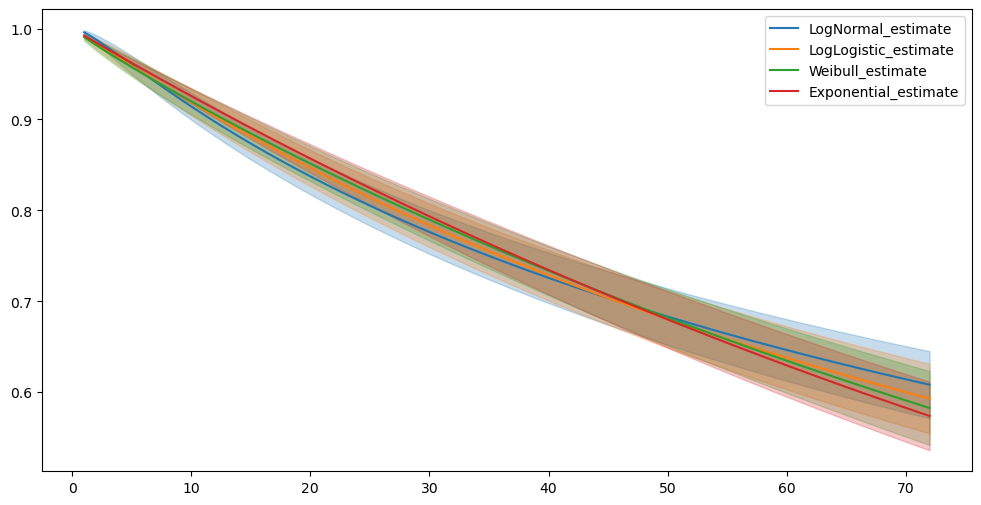

In [82]:
models = {
    "LogNormalFitter": LogNormalFitter(),
    "LogLogisticFitter": LogLogisticFitter(),
    "WeibullFitter": WeibullFitter(),
    "ExponentialFitter": ExponentialFitter()
}

fig, ax = plt.subplots(figsize=(12, 6))
for model_name, model in models.items():
    model.fit(durations=survival_data["tenure"], event_observed=survival_data["churn"])
    model.plot_survival_function(ax=ax)
    print("AIC value for", model_name, "is", model.AIC_)
    print("BIC value for", model_name, "is", model.BIC_)
    model.print_summary()
    print('=' * 100)

/var/folders/8z/d1bdm3nd38gg98xwzl35fn9r0000gn/T/ipykernel_29428/554498924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data["tenure"] = survival_data["tenure"].replace(0, 0.000001)


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2024-04-30 22:18:44 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1463.66
         time fit was run = 2024-04-30 22:18:45 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
alpha_ address                 0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       0.99       2.68       0.16             0.66             1.31                 1.94                 3.69
       custcat_Plus service    0.74       2.09       0.17             0.41             1.07                 1.50                 2.91
       custcat_Total service   1.01       2.76       0.21             0.61             1.42                 1.85                 4.13
       internet_Yes           -0.89       0.41       0.14            -1.16            -0.62                 0.31                 0.54
       marital_Unmarried      -0.43       0.65       0.11            -0.65            -0.22                 0.52                 0.80
       voice_Yes              -0.44       0.64       0.16            -0.76            -0.13                 0.47                 0.88
       Intercept               2.58      13.20       0.23             2.12             3.04                 8.36                20.83
beta_  Intercept               0.33       1.39       0.05             0.23             0.43                 1.26                 1.54

                               cmp to     z      p   -log2(p)
param  covariate                                             
alpha_ address                   0.00  4.50 <0.005      17.20
       age                       0.00  5.80 <0.005      27.21
       custcat_E-service         0.00  6.02 <0.005      29.08
       custcat_Plus service      0.00  4.38 <0.005      16.39
       custcat_Total service     0.00  4.94 <0.005      20.31
       internet_Yes              0.00 -6.45 <0.005      33.06
       marital_Unmarried         0.00 -3.92 <0.005      13.48
       voice_Yes                 0.00 -2.76   0.01       7.42
       Intercept                 0.00 11.09 <0.005      92.47
beta_  Intercept                 0.00  6.47 <0.005      33.23
---
Concordance = 0.78
AIC = 2947.33
log-likelihood ratio test = 283.09 on 8 df
-log2(p) of ll-ratio test = 185.32

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1467.92
         time fit was run = 2024-04-30 22:18:45 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                     
lambda_ address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
        age                     0.03       1.03       0.01             0.02             0.04                 1.02                 1.04
        custcat_E-service       0.93       2.54       0.16             0.63             1.24                 1.87                 3.44
        custcat_Plus service    0.68       1.97       0.17             0.35             1.00                 1.42                 2.73
        custcat_Total service   0.86       2.37       0.18             0.50             1.22                 1.65                 3.40
        internet_Yes           -0.85       0.43       0.13            -1.12            -0.59                 0.33                 0.55
        marital_Unmarried      -0.34       0.71       0.10            -0.54            -0.13                 0.58                 0.88
        voice_Yes              -0.33       0.72       0.15            -0.62            -0.05                 0.54                 0.96
        Intercept               3.01      20.33       0.22             2.58             3.45                13.14                31.46
rho_    Intercept               0.16       1.18       0.05             0.06             0.26                 1.07                 1.30

                                cmp to     z      p   -log2(p)
param   covariate                                             
lambda_ address                   0.00  4.84 <0.005      19.58
        age                       0.00  5.21 <0.005      22.37
        custcat_E-service         0.00  5.98 <0.005      28.73
        custcat_Plus service      0.00  4.08 <0.005      14.44
        custcat_Total service     0.00  4.66 <0.005      18.29
        internet_Yes              0.00 -6.36 <0.005      32.17
        marital_Unmarried         0.00 -3.24 <0.005       9.69
        voice_Yes                 0.00 -2.27   0.02       5.44
        Intercept                 0.00 13.52 <0.005     135.93
rho_    Intercept                 0.00  3.22 <0.005       9.62
---
Concordance = 0.78
AIC = 2955.84
log-likelihood ratio test = 277.02 on 8 df
-log2(p) of ll-ratio test = 181.04

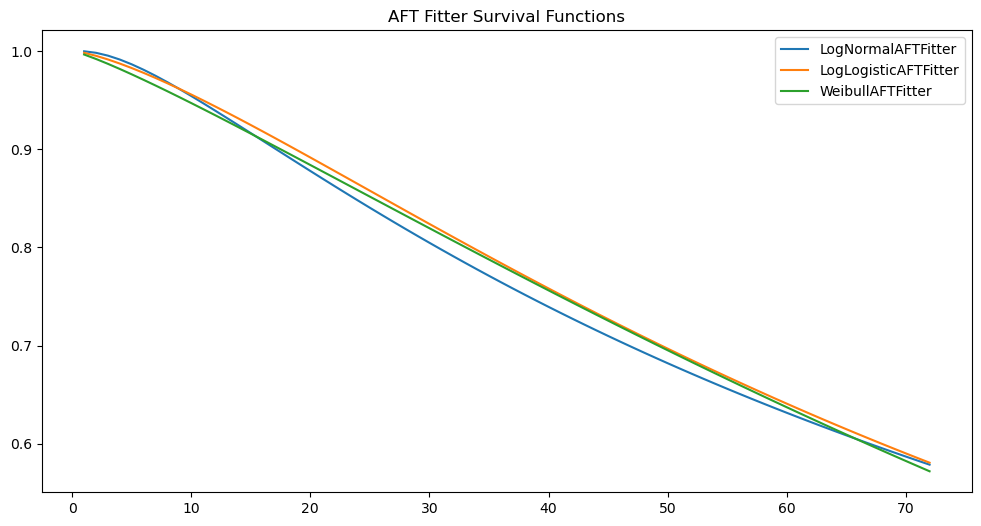

In [93]:
models = {
    "LogNormalAFTFitter": LogNormalAFTFitter(),
    "LogLogisticAFTFitter": LogLogisticAFTFitter(),
    "WeibullAFTFitter": WeibullAFTFitter()
}

survival_data["tenure"] = survival_data["tenure"].replace(0, 0.000001)
fig, ax = plt.subplots(figsize=(12, 6))
for i, (model_name, model) in enumerate(models.items(), start=1):
    model.fit(survival_data, duration_col="tenure", event_col="churn")
    model.print_summary()
    print('=' * 100)
    plt.plot(model.predict_survival_function(survival_data.loc[1]), label=model_name)

# Adding legends and titles
plt.legend()
plt.title('AFT Fitter Survival Functions')

plt.show()

 The best fitter is LogNormal fitter, because it has the lowes AIC - 2954.02 and lowest BIC - 3218.85 

Significant features have to have p-value less than 0.05. 

In [84]:
survival_data = survival_data[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [86]:
logn_aft = LogNormalAFTFitter()
logn_aft.fit(survival_data, duration_col='tenure', event_col='churn')
logn_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2024-04-30 22:18:16 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

In [87]:
pred_clv = logn_aft.predict_survival_function(survival_data)
pred_clv

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932


In [88]:
pred = pred_clv.loc[1:12, :] #kept one year
pred

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
6.0,0.980833,0.982817,0.999659,0.936468,0.989349,0.993308,0.915365,0.872090,0.998828,0.999179,...,0.987108,0.995383,0.980004,0.999925,0.984837,0.904064,0.890812,0.998314,0.992532,0.972845
7.0,0.974715,0.977228,0.999483,0.920676,0.985608,0.990795,0.895877,0.846177,0.998286,0.998785,...,0.982712,0.993560,0.973669,0.999880,0.979801,0.882762,0.867512,0.997565,0.989769,0.964713
8.0,0.968166,0.971217,0.999264,0.904736,0.981502,0.987984,0.876524,0.821099,0.997643,0.998313,...,0.977926,0.991495,0.966899,0.999824,0.974355,0.861767,0.844730,0.996685,0.986693,0.956144
9.0,0.961281,0.964870,0.999004,0.888819,0.977091,0.984916,0.857473,0.796960,0.996902,0.997763,...,0.972818,0.989211,0.959795,0.999753,0.968579,0.841235,0.822606,0.995682,0.983348,0.947260
10.0,0.954136,0.958260,0.998703,0.873040,0.972424,0.981623,0.838827,0.773801,0.996068,0.997139,...,0.967448,0.986734,0.952434,0.999669,0.962537,0.821255,0.801210,0.994563,0.979769,0.938154


In [89]:
MM = 1300
r = 12

# Calculate the discount factor for each month
discount_factors = 1 / (1 + r / 12) ** (pred.index - 1)

# Apply the discount factor to each column in pred
pred_discounted = pred.multiply(discount_factors, axis=0)

# Calculate CLV by summing across columns and multiplying by MM
data['CLV'] = MM * pred_discounted.sum(axis=0)
data

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
ID,,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,2591.641414
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,2592.535993
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,2599.264219
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,2568.425972
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,2595.359702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,0,2548.407069
997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,0,2539.574998
998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,0,2598.821835


/Users/sateantaranyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


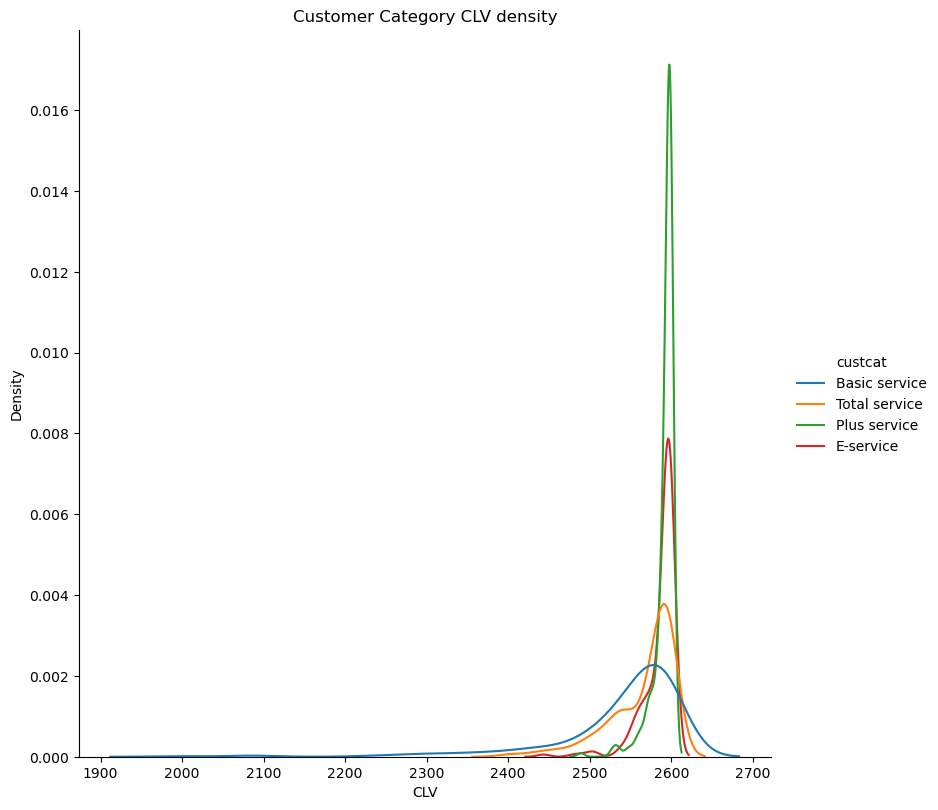

In [90]:
clv = sns.displot(data, x = 'CLV', kind = 'kde', hue = 'custcat', weights = 16, height=8)
clv.set(title = 'Customer Category CLV density')

Plus serivice users are most likely to survive.

In [91]:
# left the company within a year
average_clv_left = data["CLV"].loc[(data["tenure"] <= 12) & (data["churn"] == 1)].mean()
print(average_clv_left)

# yearly CLV of customers that left
clv_yearly = data["CLV"].loc[(data["tenure"] <= 12) & (data["churn"] == 1)].sum()
print(clv_yearly)

2515.3173954953
264108.3265270065


In [92]:
pred = pred.T.iloc[:, -1].values
budget = data["CLV"].loc[(data["tenure"] <= 12) & (pred < 0.85)].sum()
print(budget)

288781.3868182108


From our model coefficients, we can infer that a one-unit increase in a covariate will result in the mean/median survival time changing by a factor of exp(coefficient). When the coefficient is positive, exp(coefficient) is greater than 1, indicating an increase in the incident/event time. Similarly, a negative coefficient suggests a reduction in the mean/median survival time.

Being deemed a valuable customer implies generating more revenue or profit for the company over their lifetime. From the CLV density plots across various segments, it appears that customers who are married, not retired, or subscribed to the plus service can be considered valuable, with gender making less of a difference.

I've set a threshold of 0.85 for the probability of customer survival. Customers with a survival probability below 0.85 are categorized as at-risk. By summing up the expected values for these customers, we estimate the total annual value of the at-risk subscriber base. This value represents the maximum annual budget that can be allocated to retention activities while still ensuring a positive return on investment.

Various strategies can be employed to address the retention issue. These include proactively reach out to customers who show signs of disengagement or dissatisfaction, offer assistance, address concerns, do exclusive offers for at-risk customers. 